# DataMapPlot Sizing Options

This notebook will walk you through some of the sizing specific customization options that are available in DataMapPlot. There are many options, so this notebook will instead highlight some of the major options and hint at the further customization that can be achieved with respect to them. To get started we'll need to import DataMapPlot. Also, for the purposes of this documentation, I need to keep the image sizes smaller to fit in readthedocs; because of that I will set the global DPI for matplotlib (which DataMapPlot uses for plotting), but you should probably remove those lines if you are running this notebook yourself.

In [1]:
# Ensure we don't generate large images for inline docs
# You probably want to remove this if running the notebook yourself
import matplotlib
matplotlib.rcParams["figure.dpi"] = 72

import datamapplot

To demonstrate what DataMapPlot can do we'll need some data. The examples directory of the DataMapPlot repository contains some pre-prepared datasets for experimenting with. We'll grab one of those. In practice we need a data map -- as set of 2d coordinates, one per data sample we are mapping -- and a set of labels idenityfing the "topic" of a data sample, usually based on clusters in the data map. In this case we'll use a data map derived from the CORD-19 dataset -- a dataset of papers and scientific articles related to COVID-19 that was curated by Allen AI.

In [2]:
import numpy as np
import requests
import io

data_map_file = requests.get("https://github.com/TutteInstitute/datamapplot/raw/main/examples/CORD19-subset-data-map.npy")
cord19_data_map = np.load(io.BytesIO(data_map_file.content))
label_file = requests.get("https://github.com/TutteInstitute/datamapplot/raw/main/examples/CORD19-subset-cluster_labels.npy")
cord19_labels = np.load(io.BytesIO(label_file.content), allow_pickle=True)

Let's start by making the most basic DataMapPlot output based on this data so we have an idea of what the starting point looks like, and can better understand what the various customizations we will be applying can do for us.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

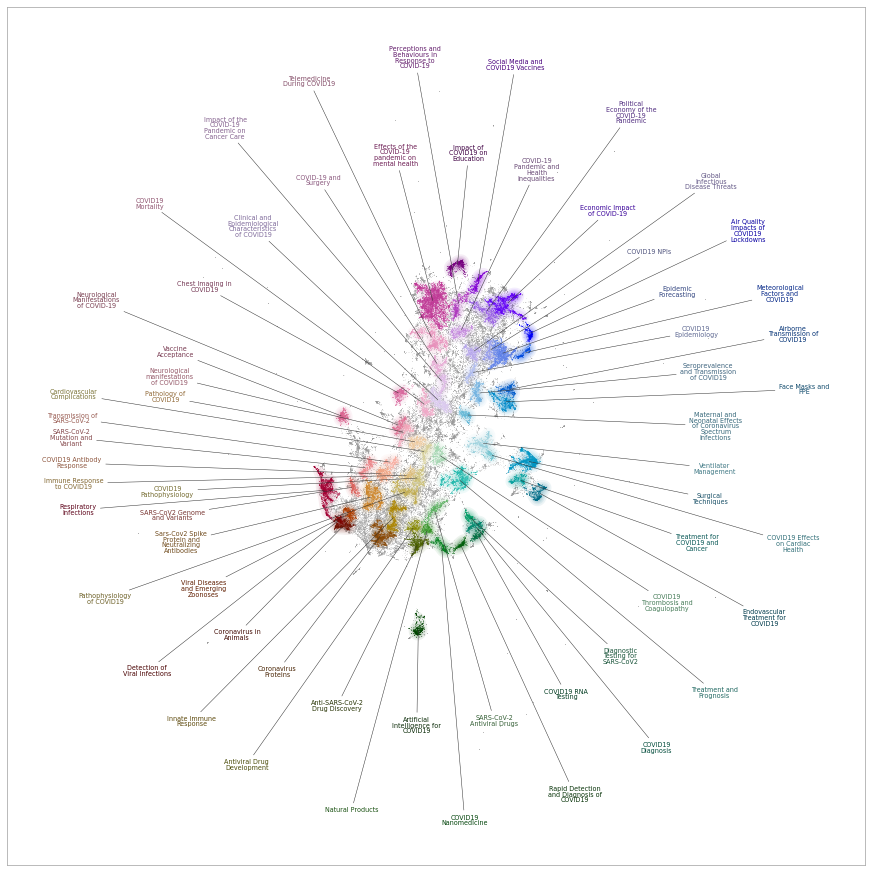

In [3]:
datamapplot.create_plot(cord19_data_map, cord19_labels)

The most obvious thing we might like to do is to change the size of the plot itself. That we can do via the ``figsize`` keyword argument. It takes a pair of values, as per matplotlib's ``figsize`` argument, that give the desired width and height of the figure *in inches*. The actual size of the resulting plot (in pixels) will depend on the dots per inch (DPI) setting in matplotlib. By default that is set to 100 dots per inch for the standard backend, but it can vary. In this notebook we specifically lowered it to keep the plots smaller (in pixel size) for the on-line documentation. Let's see what happens if we change the ``figsize`` in ``create_plot``.

(<Figure size 576x432 with 1 Axes>, <Axes: >)

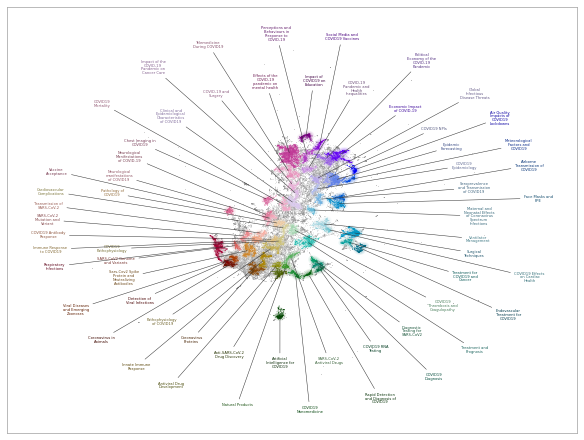

In [4]:
datamapplot.create_plot(cord19_data_map, cord19_labels, figsize=(8, 6))

We get a smaller plot (compared to the default ``(12, 12)`` value that DataMapPlot uses), and notably a slightly different aspect ratio. Imprtantly the text label layout is sensitive to this, and will still try to avoid overlaps even in this different aspect ratio. Also note that, if you really wish to have explicit control in pixels you can specify the DPI of the resulting plot directly to ``create_plot`` via the ``dpi`` keyword argument.

So we can change the size of the overall plot, how about controlling the sizes of the text labels and the points in the plot? We can definitely do that as well. By dfault DataMapPlot tries to automatically choose a size for the text that will allow all the labels to be laid out well with no overlapping text. You can, however, override this behaviour and specifically request a given text size (in points) via the ``label_font_size`` keyword argument. Be warned that while the layout algorithm will do its best to fit everything in, it simply may not be possible to do so, and overlapping text labels and indicator lines can definitely happen as a result -- especially if you choose too large a text size. It will likely take a little experimentation to find the text size that works (assuming you don't trust DataMapPlot to simply do it for you).

How about changing the sizes of the markers in the scatterplot? The ``point_size`` keyword argument handles that. This does get a little more tricky, as exactly what units the "point size" is in is dependent on the backend beign used to generate the scatterplot. By default anything over 100,000 points uses datashader to create the scatterplot, while plots with fewer points use matplotlib's scatterplot. In default mode various heuristics are used to choose the best point-size, dependent on which plotting type is being used. If you are specifying the point-size yourself directly it will likely take a little experimentation to find what size works. If you have a lot of points and DataMapPlot is using datashader then point-size should be an *integer* value, likely 0, 1, or 2, possibly 3 at the most. If, on the hand, you are in matplotlib-scatterplot mode then you have a lot more flexibility in determining the point size, and in general larger values may be required. The easiest thing to do is to simply try some values and quickly work out what will work for your needs.

In this case we are definitely in datashader mode, so let's pick a "large" point-size for that of 2, and pick a large-ish ``label_font_size`` for the number of labels we have and see what the layout algorithm can do.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

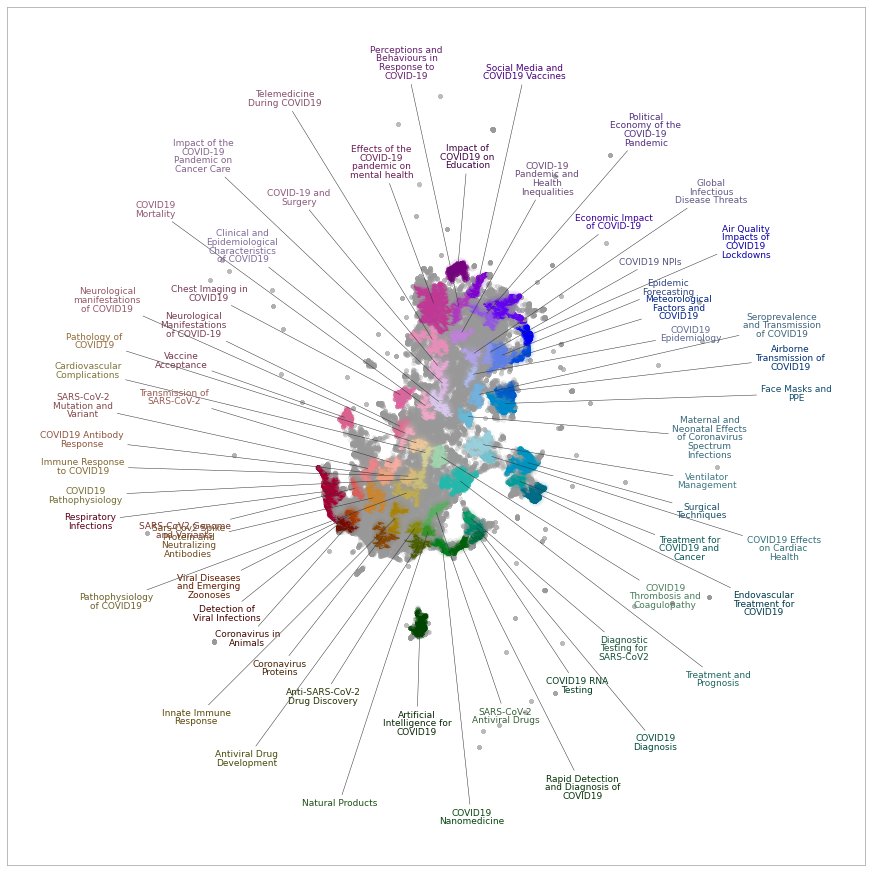

In [5]:
datamapplot.create_plot(cord19_data_map, cord19_labels, label_font_size=9, point_size=2)

The points are now very large, and our font-size was perhaps too ambitious as there is some overlaps ocurring.

What if we want to play with the marker type? There is support for that via the ``marker_type`` keyword, but only in matplotlib-scatterplot mode. So if we set a marker-type in ``create_plot`` we will get a warning, and the marker type will not change.

/work/home/lmmcinn/src/datamapplot/datamapplot/plot_rendering.py:184: UserWarning: Adjusting marker type or size cannot be done with datashader; use force_matplotlib=True
  warn(


(<Figure size 864x864 with 1 Axes>, <Axes: >)

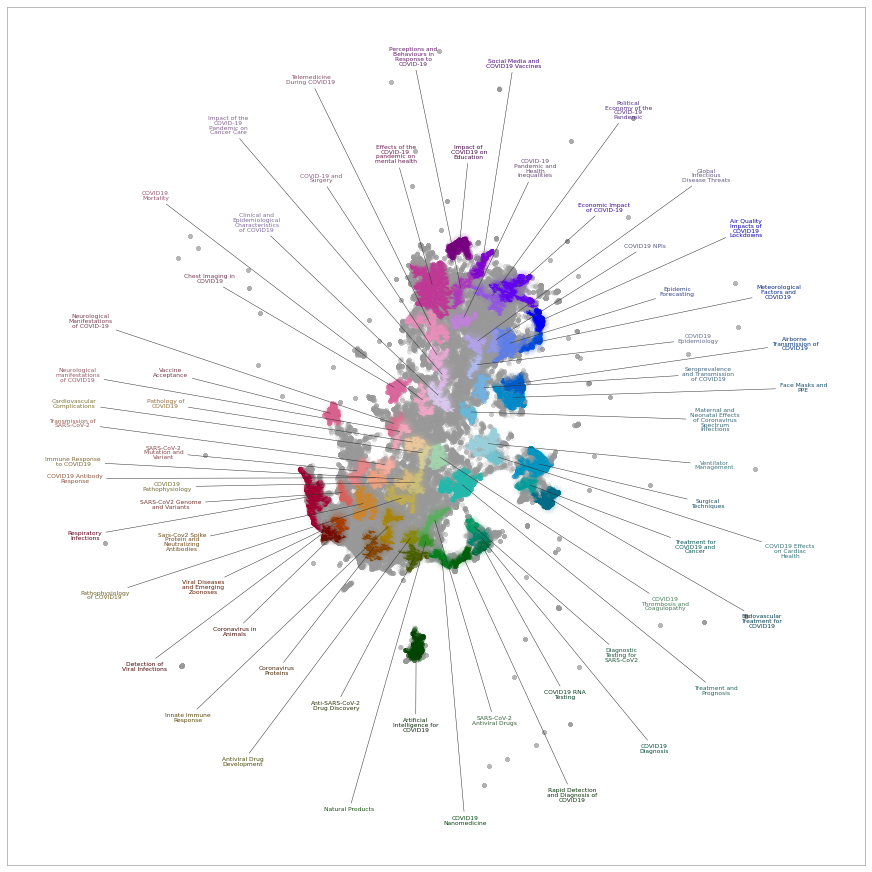

In [6]:
datamapplot.create_plot(cord19_data_map, cord19_labels, label_font_size=6, point_size=2, marker_type="s")

Fortunately the warning told us that we can use ``force_matplotlib=True`` to remedy this. Let's add that to our arguments and see what happens -- noting that we will have to significantly change the ``point_size`` for matplotlib-style point sizing.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

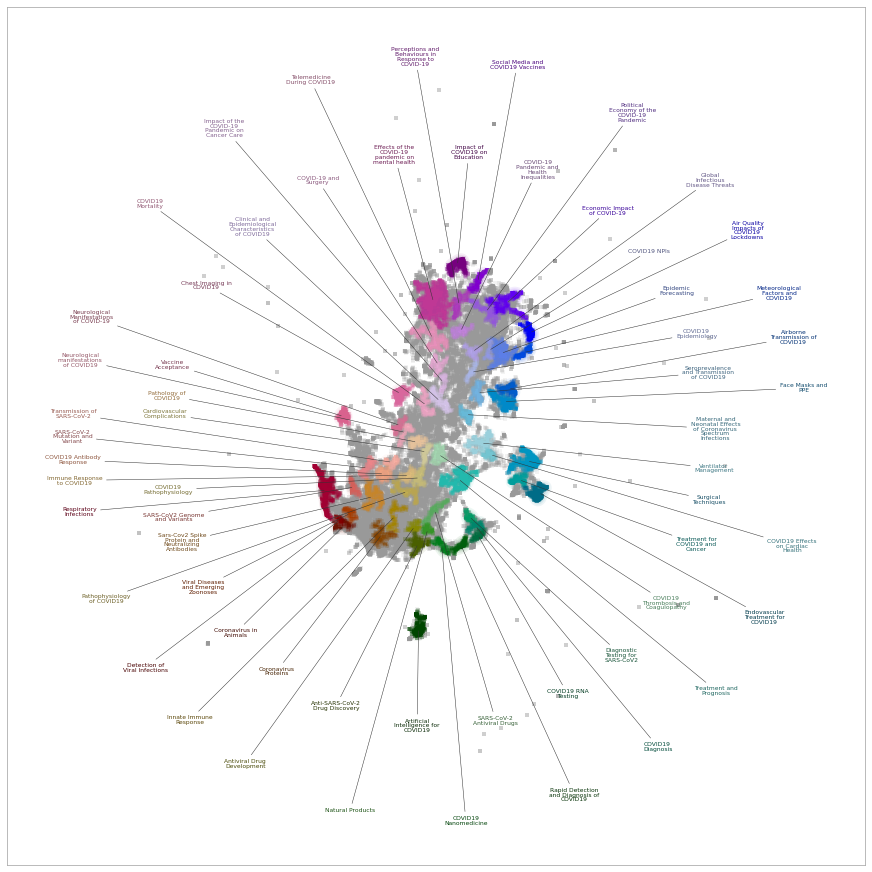

In [7]:
datamapplot.create_plot(cord19_data_map, cord19_labels, label_font_size=6, point_size=16, marker_type="s", force_matplotlib=True)

So we do indeed get different markers -- in this case squares. For details on the different marker types that can be used see the [matplotlib documentation on marker types](https://matplotlib.org/stable/api/markers_api.html).

How about if we want variable marker sizes -- potentially according to some other information? Again we can do that. Let's get citation count data for the CORD-19 dataset subset we are working with here -- available in the examples directory of the DataMapPlot repository.

In [8]:
citation_count_file = requests.get("https://github.com/TutteInstitute/datamapplot/raw/main/examples/CORD19-subset-citation_counts.npy")
citation_counts = np.load(io.BytesIO(citation_count_file.content))

Now we can specify a ``marker_size_array`` that gives a marker size for each individual point in the plot. By passing in the citation counts we can have larger markers for more impactful papers, and smaller markers for less influential papers. Note that it is up to you to transform the extra data you want to use into something in a suitable range of marker sizes. Also note that this particular behaviour is only available in matplotlib-scatterplot mode, so you will have to use ``force_matplotlib=True`` to make this work.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

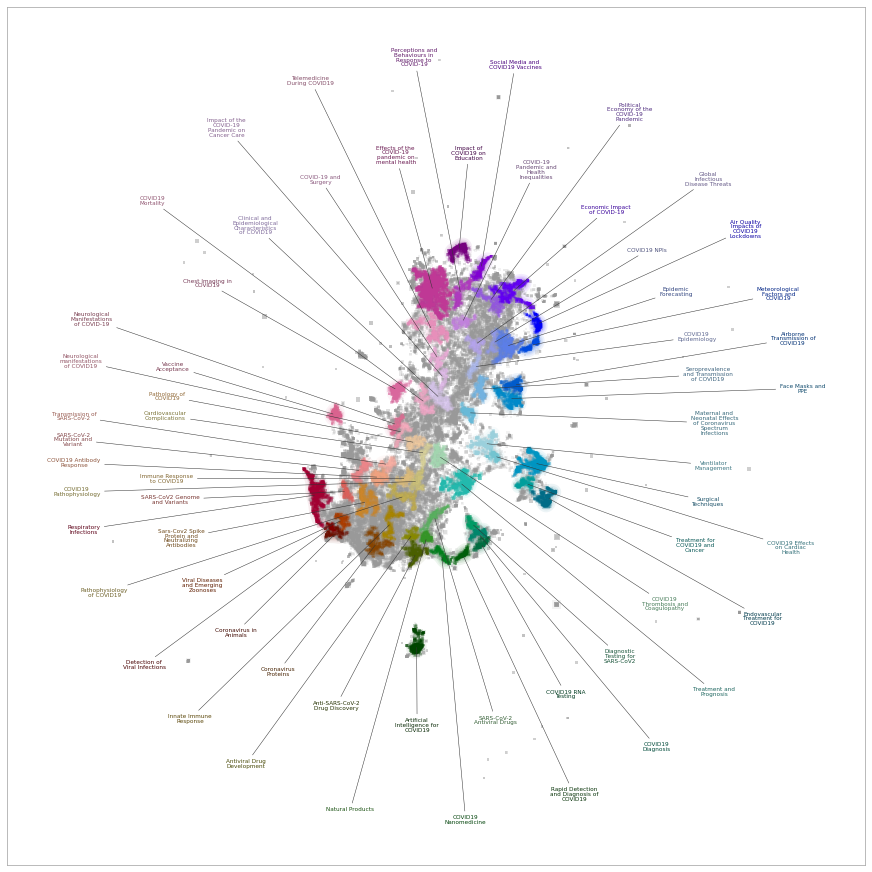

In [9]:
datamapplot.create_plot(cord19_data_map, cord19_labels, point_size=1, marker_type="s", marker_size_array=np.sqrt(citation_counts), force_matplotlib=True)

The last item that we will be looking at is the "glow" around the clusters which helps highlight regions of high density where many points are packed together. This is on be default, but you can turn it off by setting ``add_glow`` to ``False``.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

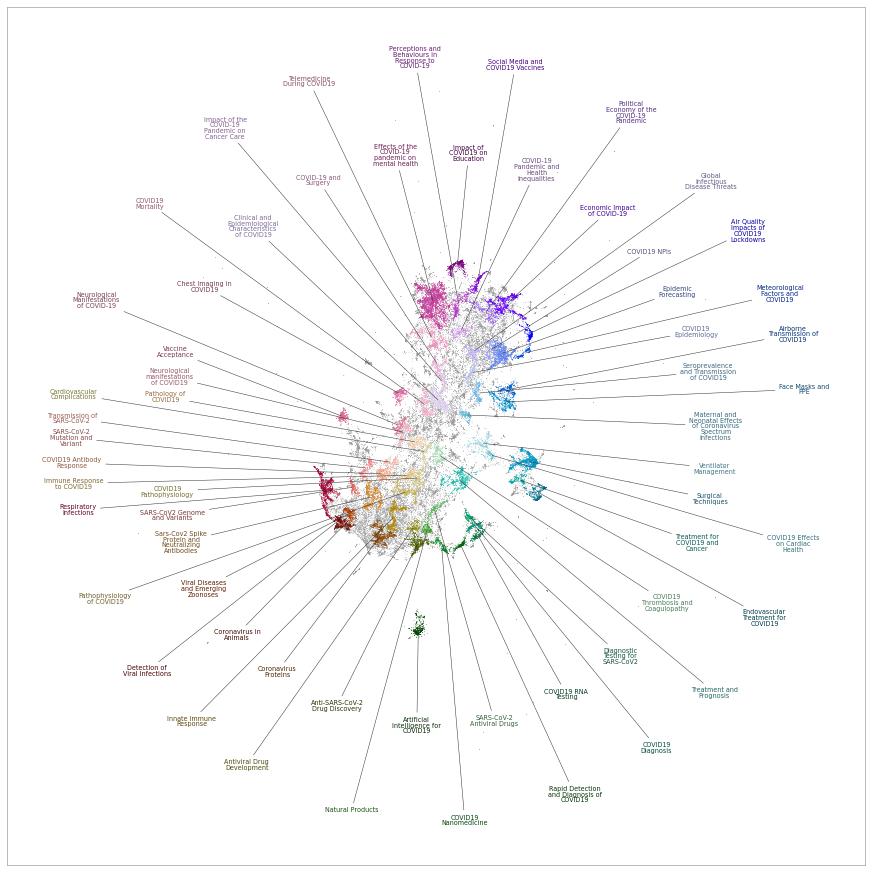

In [10]:
datamapplot.create_plot(cord19_data_map, cord19_labels, add_glow=False)

More importantly there is the ability to control the size and spread of the glow effect via the ``glow_keywords`` which takes a dictionary of keywords that are passed to the ``add_glow_to_scatterplot`` function. It is not worth getting into all the details here, but suffice to say that the main options are:

 * ``kernel_bandwidth`` which controls how wide the glow spreads
 * ``kernel`` which controls the kernel type; the default is ``"gaussian"`` but see the [sklearn KernelDensity documentation](https://scikit-learn.org/stable/modules/density.html#kernel-density) for more options.
 * ``n_levels`` which controls how many "levels" in the contour plot to draw; the default should be fine, but you may want to increase this for very large plots (e.g. posters).
 * ``max_alpha`` which controls the translucency of the glow. The value should be between 0 and 1, with larger values creating less translucent glow effects.

With that in mind, let's try some examples. We can use a cosine kernel with a large bandwidth and a high max_alpha to create a very bold glow effect.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

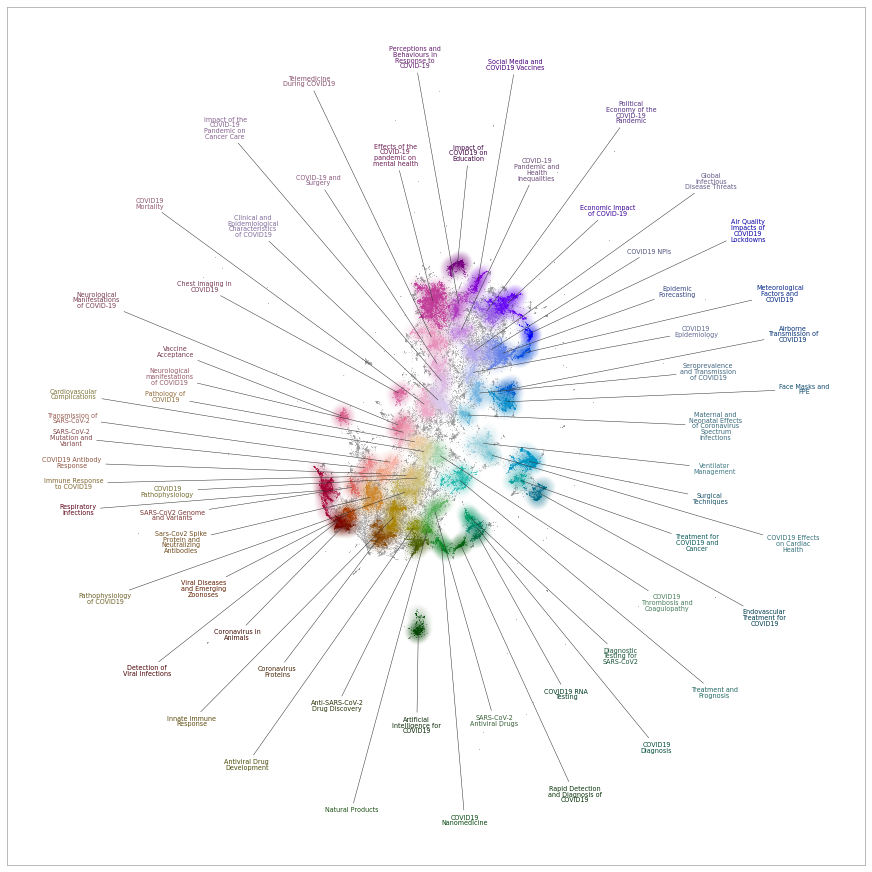

In [11]:
datamapplot.create_plot(cord19_data_map, cord19_labels, glow_keywords={"kernel_bandwidth":0.75, "kernel":"cosine", "n_levels":32, "max_alpha":0.9})

Alternatively we can use an exponential kernel, which decays very rapidly but spreads widely, along with a small bandwidth to create a tighter glow around dense clusters.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

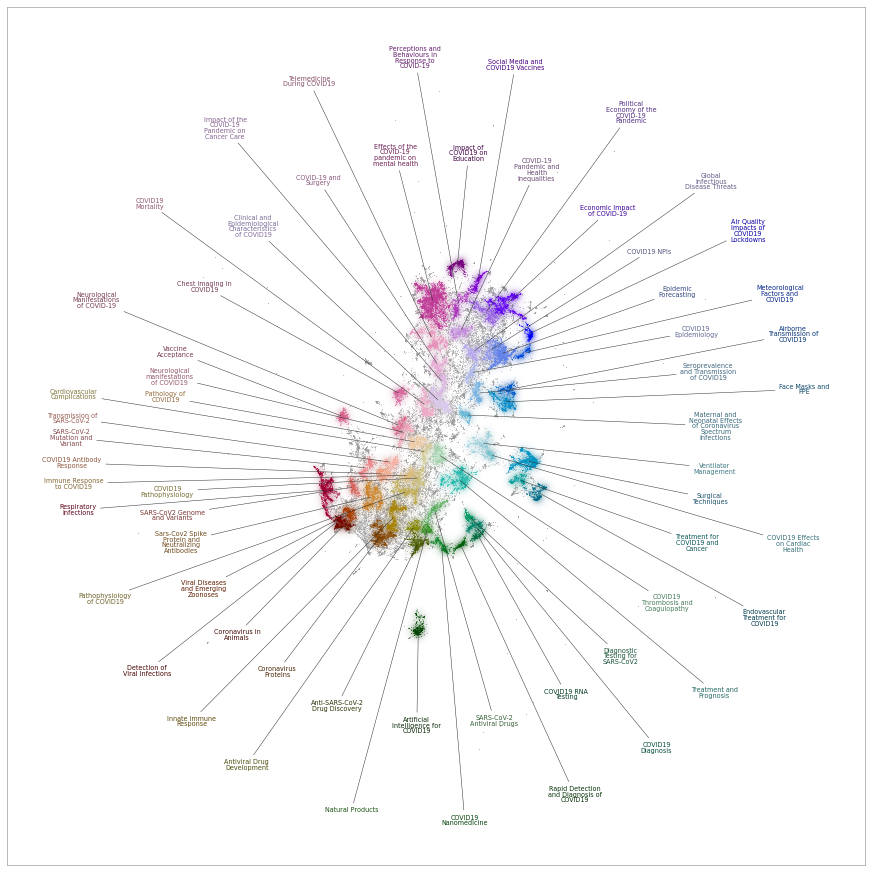

In [12]:
datamapplot.create_plot(cord19_data_map, cord19_labels, glow_keywords={"kernel_bandwidth":0.15, "kernel":"exponential", "n_levels":128, "max_alpha":0.9})

Obviously there are a lot more options for tweaking the glow to do what you want, but that will best be done by experimentation on your part.